# Understanding Pandas Series and DataFrames - Lab

## Introduction

In this lab, let's get some hands-on practice working with data cleanup using Pandas.

## Objectives
You will be able to:

- Use the `.map()` and `.apply()` methods to apply a function to a pandas Series or DataFrame 
- Perform operations to change the structure of pandas DataFrames 
- Change the index of a pandas DataFrame 
- Change data types of columns in pandas DataFrames 

## Let's get started! 

Import the file `'turnstile_180901.txt'`. 

In [1]:
# Import the required libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Import the file 'turnstile_180901.txt'
df = pd.read_csv('turnstile_180901.txt')

# Print the number of rows ans columns in df
print(df.shape)

# Print the first five rows of df
df.head()

(197625, 11)


,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,08:00:00,REGULAR,6736105,2283229
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,12:00:00,REGULAR,6736180,2283314
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,16:00:00,REGULAR,6736349,2283384


Rename all the columns to lower case: 

In [3]:
# Rename all the columns to lower case
df.columns = df.columns.str.lower()

Change the index to `'linename'`: 

In [4]:
# Change the index to 'linename'
df.set_index('linename', inplace=True)

Reset the index: 

In [5]:
# Reset the index
df.reset_index(inplace=True)

Create another column `'Num_Lines'` that is a count of how many lines pass through a station. Then sort your DataFrame by this column in descending order. 

*Hint: According to the [data dictionary](http://web.mta.info/developers/resources/nyct/turnstile/ts_Field_Description.txt), LINENAME represents all train lines that can be boarded at a given station. Normally lines are represented by one character. For example, LINENAME 456NQR represents trains 4, 5, 6, N, Q, and R.*

In [6]:
# Add a new 'num_lines' column
df['Num_Lines'] = df['linename'].str.len()

Write a function to clean column names: 

In [7]:
def clean(col_name):
    # Clean the column name in any way you want to. Hint: think back to str methods 
    df.columns = [clean(c) for c in df.columns]
    return cleaned

In [8]:
# Use the above function to clean the column names
cleaned = df.columns

In [9]:
# Check to ensure the column names were cleaned
df.columns

Index(['linename', 'c/a', 'unit', 'scp', 'station', 'division', 'date', 'time',
       'desc', 'entries',
       'exits                                                               ',
       'Num_Lines'],
      dtype='object')

- Change the data type of the `'date'` column to a date 
- Add a new column `'day_of_week'` that represents the day of the week

In [10]:
# Convert the data type of the 'date' column to a date
df['date'] = pd.to_datetime(df['date'])

# Add a new column 'day_of_week' that represents the day of the week 
df['day_of_week'] = df['date'].dt.day_name()

/tmp/ipykernel_1470/1277650751.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped = df.groupby('day_of_week').sum()


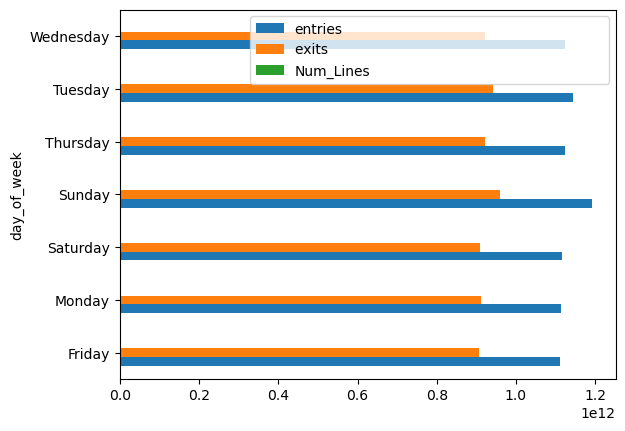

In [11]:
# Group the data by day of week and plot the sum of the numeric columns
grouped = df.groupby('day_of_week').sum()
grouped.plot(kind='barh')
plt.show();

- Remove the index of `grouped` 
- Print the first five rows of `grouped` 

In [12]:
# Reset the index of grouped
grouped.reset_index(inplace=True)
grouped =  grouped.set_index('day_of_week')

# Print the first five rows of grouped
grouped.head(10)

,entries,exits,Num_Lines
day_of_week,,,
Friday,1110224700078,906799065337,75573
Monday,1114237052454,911938153513,76110
Saturday,1115661545514,909142081474,74725
Sunday,1192306179082,959223750461,75306
Thursday,1122723988662,920691927110,76607
Tuesday,1143313287046,942230721477,77303
Wednesday,1123655222441,920630864687,75713


Add a new column `'is_weekend'` that maps the `'day_of_week'` column using the dictionary `weekend_map` 

In [13]:
# Use this dictionary to create a new column 
weekend_map = {0:False, 1:False, 2:False, 3:False, 4:False, 5:True, 6:True}

# Add a new column 'is_weekend' that maps the 'day_of_week' column using weekend_map

df['is_weekend'] = df['day_of_week'].map(weekend_map)

# I modified the "grouped['is_weekend'] = grouped['day_of_week'].map(weekend_map)" because it was causing an error message

In [19]:
# Will try it here:
grouped['is_weekend'] = df['day_of_week'].map(weekend_map)

In [20]:
# Print the first five rows of grouped
grouped.head()

,entries,exits,Num_Lines,is_weekend
day_of_week,,,,
Friday,1110224700078,906799065337,75573,NaN
Monday,1114237052454,911938153513,76110,NaN
Saturday,1115661545514,909142081474,74725,NaN
Sunday,1192306179082,959223750461,75306,NaN
Thursday,1122723988662,920691927110,76607,NaN


In [21]:
grouped.groupby('is_weekend').sum()

,entries,exits,Num_Lines
is_weekend,,,


In [17]:
# Group the data by weekend/weekday and plot the sum of the numeric columns
wkend = grouped.groupby('is_weekend').sum()
wkend[['entries', 'exits']].plot(kind='barh')
plt.show()

KeyError: "['exits'] not in index"

/tmp/ipykernel_16299/3993313649.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped = df.groupby('is_weekend').sum()


IndexError: index 0 is out of bounds for axis 0 with size 0

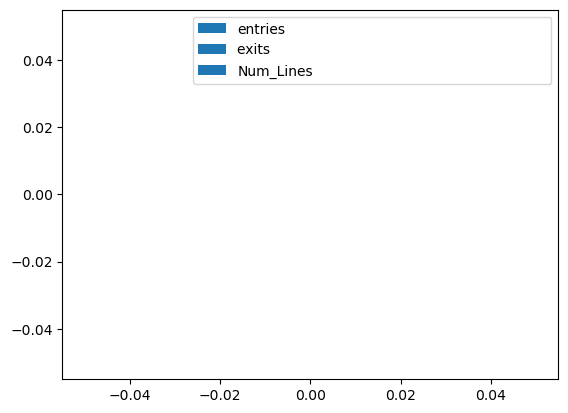

In [99]:
# Lets try that again
grouped = df.groupby('is_weekend').sum()
grouped.plot(kind='barh')
plt.show();

Remove the `'c/a'` and `'scp'` columns. 

In [88]:
# Remove the 'c/a' and 'scp' columns
df = df.drop(columns=['c/a', 'scp'])
df.head(2)

,linename,unit,station,division,date,time,desc,entries,exits,Num_Lines,day_of_week
0,NQR456W,R051,59 ST,BMT,2018-08-25,00:00:00,REGULAR,6736067,2283184,7,Saturday
1,NQR456W,R051,59 ST,BMT,2018-08-25,04:00:00,REGULAR,6736087,2283188,7,Saturday


In [100]:
df.describe()

,entries,exits,Num_Lines
count,1.976250e+05,1.976250e+05,197625.000000
mean,4.008664e+07,3.274210e+07,2.688612
std,2.071853e+08,1.907195e+08,2.385399
min,0.000000e+00,0.000000e+00,1.000000
25%,4.912700e+05,2.364400e+05,1.000000
50%,2.507222e+06,1.404800e+06,2.000000
75%,6.965458e+06,4.809089e+06,3.000000
max,2.129771e+09,2.062565e+09,12.000000


## Analysis Question 

What is misleading about the day of week and weekend/weekday charts you just plotted?

In [ ]:
# Your answer here 

## Summary

Great! You practiced your data cleanup skills using Pandas.